In [207]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [208]:
def read_files(freq_band):
    scpc = "_scpc_channel_data"
    mcc = "_mcc_packet_lost"
    sat = "_sat_packet_lost"

    data = pd.read_csv(freq_band + scpc + '.txt', sep=",", header=0)
    real = data.head()

    f = open(freq_band + mcc + '.txt', "r")
    print(f.read()) 
    f.close()

    f = open(freq_band + sat + '.txt', "r")
    print(f.read()) 
    f.close()

    # Calculate power_dBm stats for every 5 lines (uplink/downlink pairs)
    atmosl_uplink = []
    atmosl_downlink = []

    for i in range(len(data)):
        if str(data.iloc[i,0])[-2] == '.':
            atmosl_uplink.append(data.iloc[i,1])
        else:
            atmosl_downlink.append(data.iloc[i,1])

    print(f"Average uplink Atmospheric loss (dB): {np.average(atmosl_uplink):.3f}")
    print(f"Stddev uplink Atmospheric loss (dB): {np.std(atmosl_uplink):.3f}")

    print(f"Average downlink Atmospheric loss (dB): {np.average(atmosl_downlink):.3f}")
    print(f"Stddev downlink Atmospheric loss (dB): {np.std(atmosl_downlink):.3f}")
    print()

    # Calculate power_dBm stats for every 5 lines (uplink/downlink pairs)
    fspl_uplink = []
    fspl_downlink = []
    
    for i in range(len(data)):
        if str(data.iloc[i,0])[-2] == '.':
            fspl_uplink.append(data.iloc[i,2])
        else:
            fspl_downlink.append(data.iloc[i,2])

    print(f"Average uplink FSPL (dB): {np.average(fspl_uplink):.3f}")
    print(f"Stddev uplink FSPL (dB): {np.std(fspl_uplink):.3f}")

    print(f"Average downlink FSPL (dB): {np.average(fspl_downlink):.3f}")
    print(f"Stddev downlink FSPL (dB): {np.std(fspl_downlink):.3f}")
    print()

    # Calculate power_dBm stats for every 5 lines (uplink/downlink pairs)
    power_dBm_uplink = []
    power_dBm_downlink = []
    
    for i in range(len(data)):
        if str(data.iloc[i,0])[-2] == '.':
            power_dBm_uplink.append(data.iloc[i,3])
        else:
            power_dBm_downlink.append(data.iloc[i,3])

    print(f"Average uplink power (dBm): {np.average(power_dBm_uplink):.3f}")
    print(f"Stddev uplink power (dBm): {np.std(power_dBm_uplink):.3f}")

    print(f"Average downlink power (dBm): {np.average(power_dBm_downlink):.3f}")
    print(f"Stddev downlink power (dBm): {np.std(power_dBm_downlink):.3f}")


def read_and_plot_files(freq_band):
    read_files(freq_band)

    scpc_file = freq_band + "_scpc_channel_data.txt"
    raw_scpc_data = pd.read_csv(scpc_file, sep=",", header=0)
    ul_scpc_data = raw_scpc_data[~raw_scpc_data['simTime'].astype(str).str.contains("000")]

    weather_file = freq_band + "_mcc_weather_data.txt"
    raw_weather_data = pd.read_csv(weather_file, sep=",", header=0)
    ul_weather_data = raw_weather_data[~raw_weather_data['simTime'].astype(str).str.contains("0001")]

    dl_scpc_data = raw_scpc_data[raw_scpc_data['simTime'].astype(str).str.contains("000")]
    
    uplink_packet_loss_file = freq_band + "_sat_packet_loss_details.txt"
    upl_data = pd.read_csv(uplink_packet_loss_file, sep=",", header=0)

    downlink_packet_loss_file = freq_band + "_mcc_packet_loss_details.txt"
    downl_data = pd.read_csv(downlink_packet_loss_file, sep=",", header=0)

    num_mccs = ul_weather_data['MCCIndex'].max() + 1

    for mcc_index in range(num_mccs):
        try:
            # Generic sim_time for all (doesn't really matter)
            sim_time = ul_weather_data.loc[ul_weather_data['MCCIndex'] == mcc_index, 'simTime']

            # Except for this because of the extra comma precisions
            packet_loss_downl_sim_time = downl_data.loc[downl_data['MCC_idx'] == mcc_index, 'simTime']

            dl_sim_time = dl_scpc_data.loc[dl_scpc_data['MCC_idx'] == mcc_index, 'simTime']

            # Get data to plot per MCC
            weather_data_to_plot = ul_weather_data.loc[ul_weather_data['MCCIndex'] == mcc_index, 'specWeatherModel']
            atmospheric_loss = ul_scpc_data.loc[ul_scpc_data['MCC_idx'] == mcc_index, 'atmosphericLoss_dB'].values
            upl = upl_data.loc[upl_data['MCC_idx'] == mcc_index, 'packet_is_loss']
            downl = downl_data.loc[downl_data['MCC_idx'] == mcc_index, 'packet_is_loss']

            dl_loss_data = dl_scpc_data.loc[dl_scpc_data['MCC_idx'] == mcc_index]

            _, axes1 = plt.subplots(2, 1, figsize=(12, 8), sharex=True)

            # Plot 1: Uplink weather and atmospheric loss
            axes1[0].plot(sim_time, weather_data_to_plot, label=f'Weather (mm of rain)', color='blue')
            axes1[0].plot(sim_time, atmospheric_loss, label=f'Atmospheric Loss (dB)', color='red')
            axes1[0].title.set_text(f'Weather at MCC {mcc_index} and Atmospheric Loss during Uplink')
            axes1[0].set_xlabel('Simulation Time')
            axes1[0].legend()
            axes1[0].grid(True)

            # Plot 2: Uplink packet loss
            axes1[1].plot(sim_time, upl, label=f'Uplink Packet Loss', color='green', drawstyle="steps-post")
            axes1[1].set_xlabel('Simulation Time')
            axes1[1].set_ylabel('Packet Loss (0/1)')
            axes1[1].title.set_text(f'Uplink Packet Loss from MCC {mcc_index}')
            axes1[1].grid(True)
            plt.show()

            _, axes2 = plt.subplots(2, 1, figsize=(12, 8), sharex=True)
            # Plot 3: Downlink weather and atmospheric loss
            axes2[0].plot(dl_sim_time, dl_loss_data['weatherAtMCC'], label=f'Weather (mm of rain)', color='blue')
            axes2[0].plot(dl_sim_time, dl_loss_data['atmosphericLoss_dB'], label=f'Atmospheric Loss (dB)', color='red')
            axes2[0].title.set_text(f'Weather at MCC {mcc_index} and Atmospheric Loss during Downlink')
            axes2[0].set_xlabel('Simulation Time')
            axes2[0].legend()
            axes2[0].grid(True)

            # Plot 4: Downlink packet loss
            axes2[1].plot(packet_loss_downl_sim_time, downl, label=f'Downlink Packet Loss', color='purple', drawstyle="steps-post") # Different color for downlink
            axes2[1].title.set_text(f'Downlink Packet Loss to MCC {mcc_index}')
            axes2[1].set_xlabel('Simulation Time')
            axes2[1].set_ylabel('Packet Loss (0/1)')
            axes2[1].grid(True)
            plt.show()
            
        except:
            print('err')

# Dynamic Weather Data

## C-Band

MCC 0: Packets Sent = 631
MCC 0: Packets Lost = 79
MCC 1: Packets Sent = 631
MCC 1: Packets Lost = 111
MCC 2: Packets Sent = 631
MCC 2: Packets Lost = 77
MCC 3: Packets Sent = 631
MCC 3: Packets Lost = 115
MCC 4: Packets Sent = 631
MCC 4: Packets Lost = 104

Satellite: Packets Sent = 2870
Satellite: Packets Lost = 280

Average uplink Atmospheric loss (dB): 2.000
Stddev uplink Atmospheric loss (dB): 1.414
Average downlink Atmospheric loss (dB): 2.002
Stddev downlink Atmospheric loss (dB): 1.447

Average uplink FSPL (dB): 5.961
Stddev uplink FSPL (dB): 4.400
Average downlink FSPL (dB): 2.292
Stddev downlink FSPL (dB): 1.684

Average uplink power (dBm): 199.220
Stddev uplink power (dBm): 0.091
Average downlink power (dBm): 195.744
Stddev downlink power (dBm): 0.107


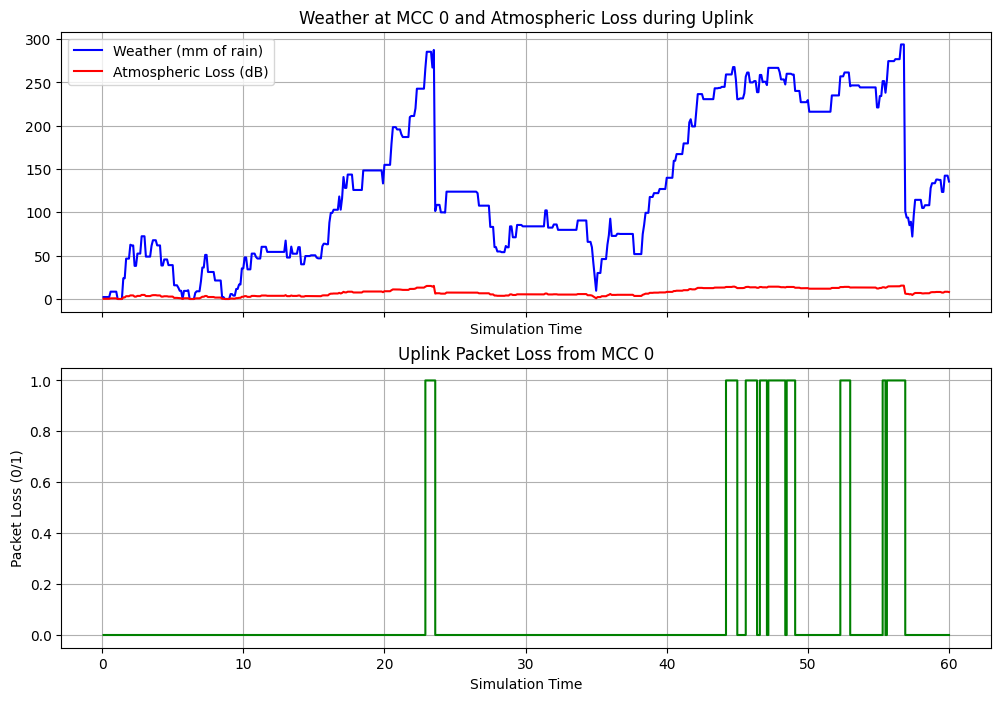

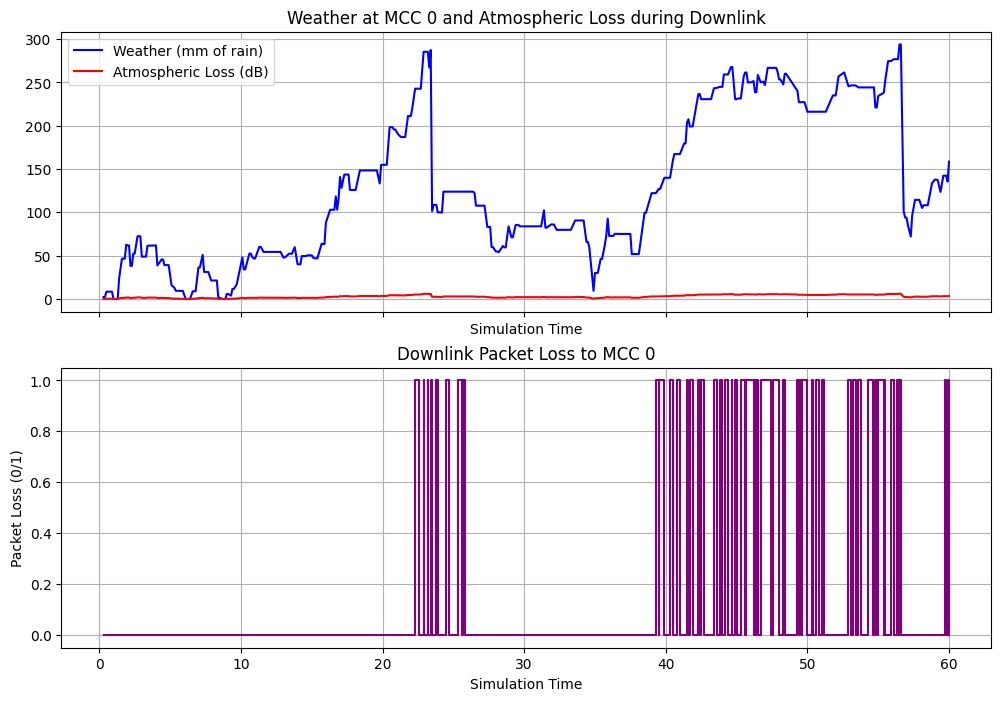

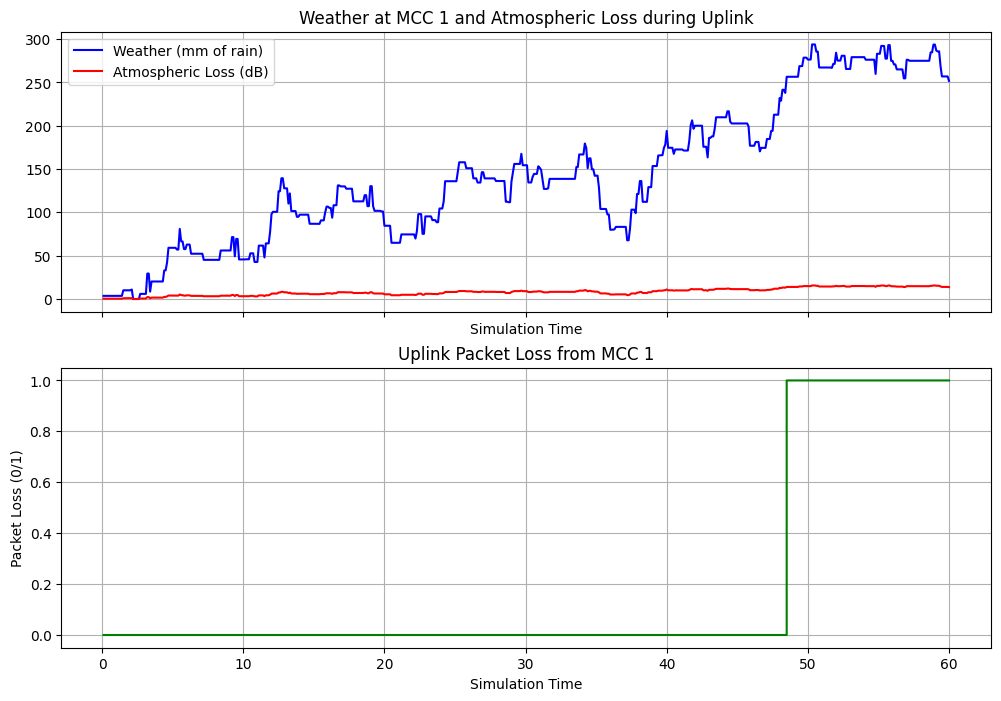

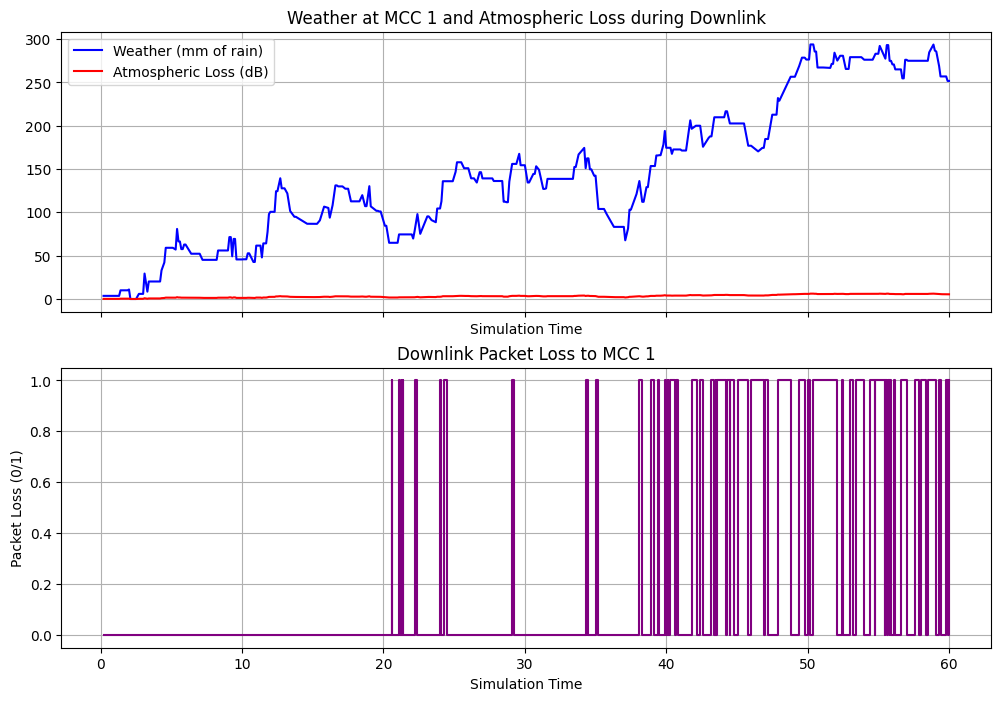

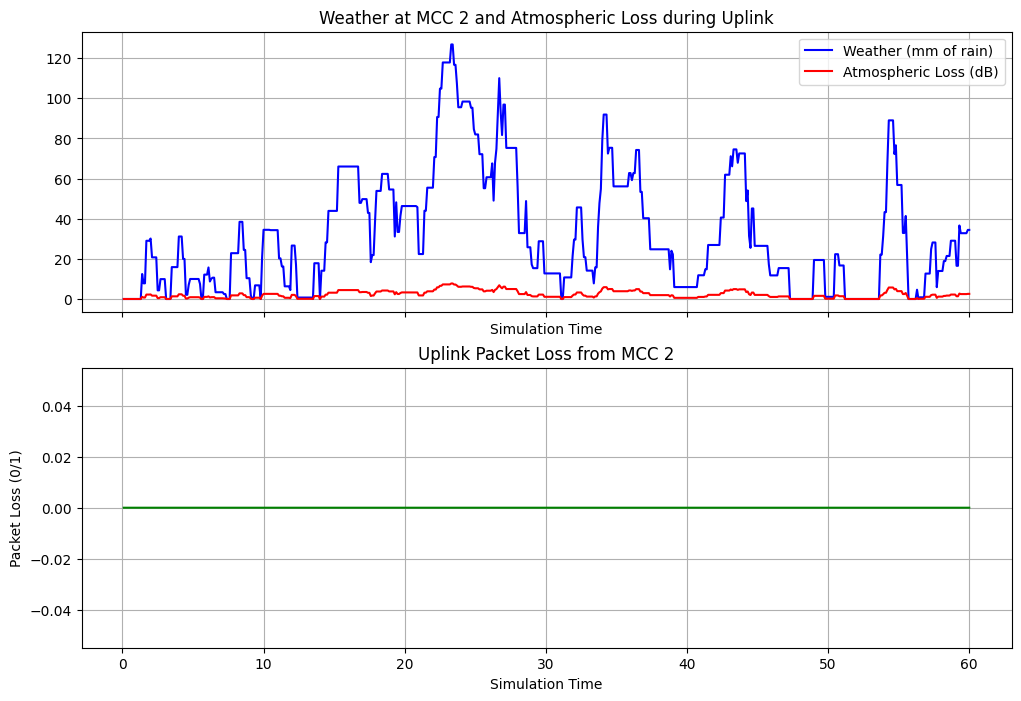

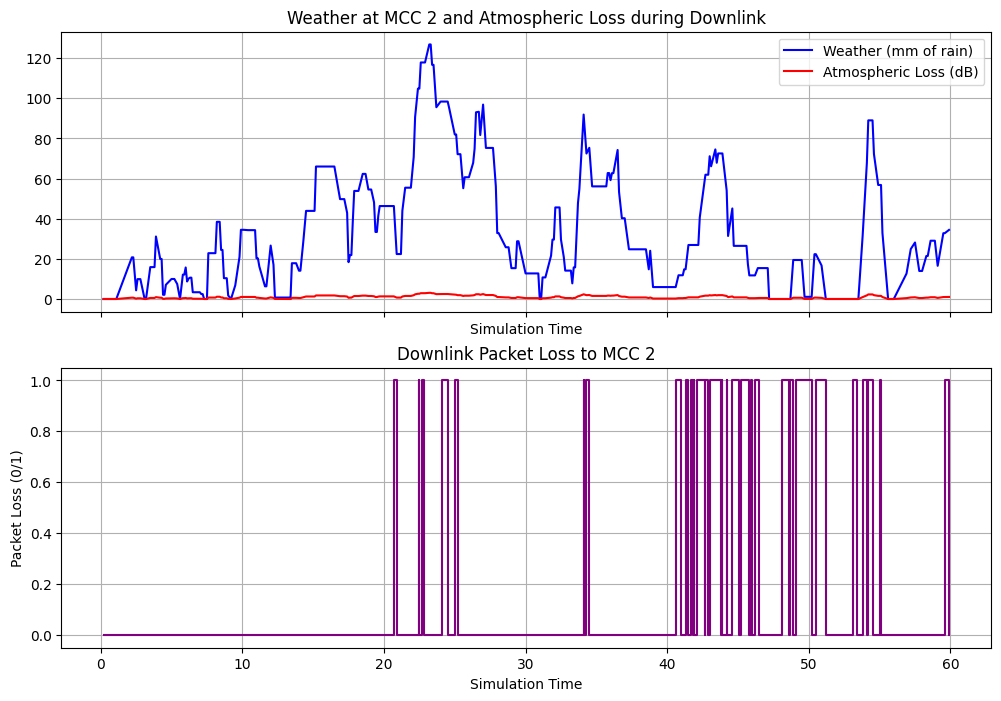

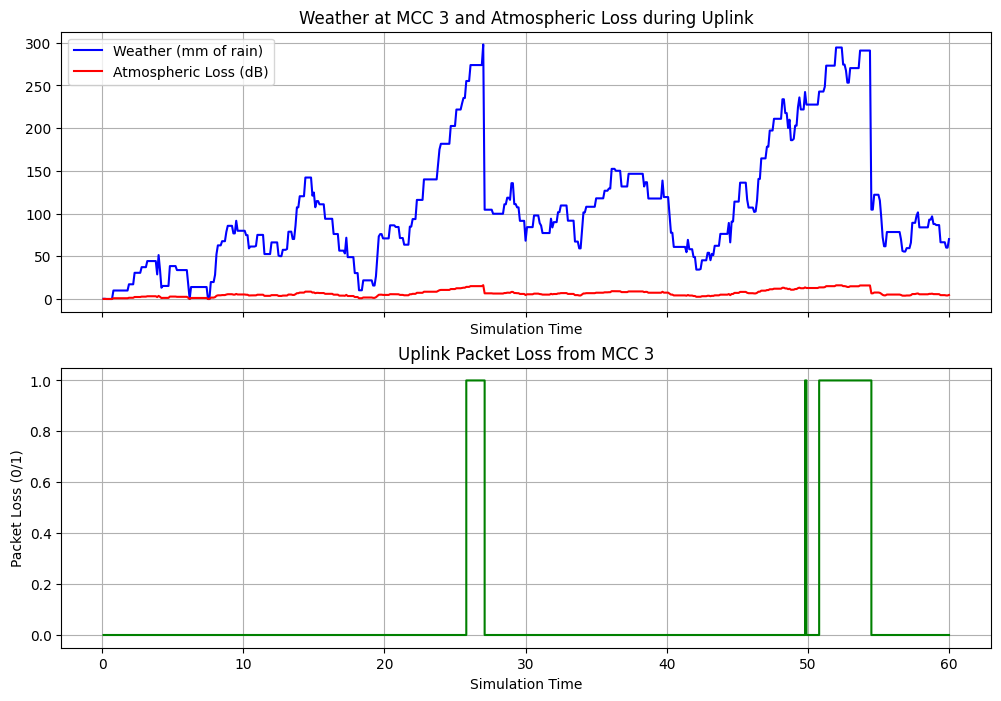

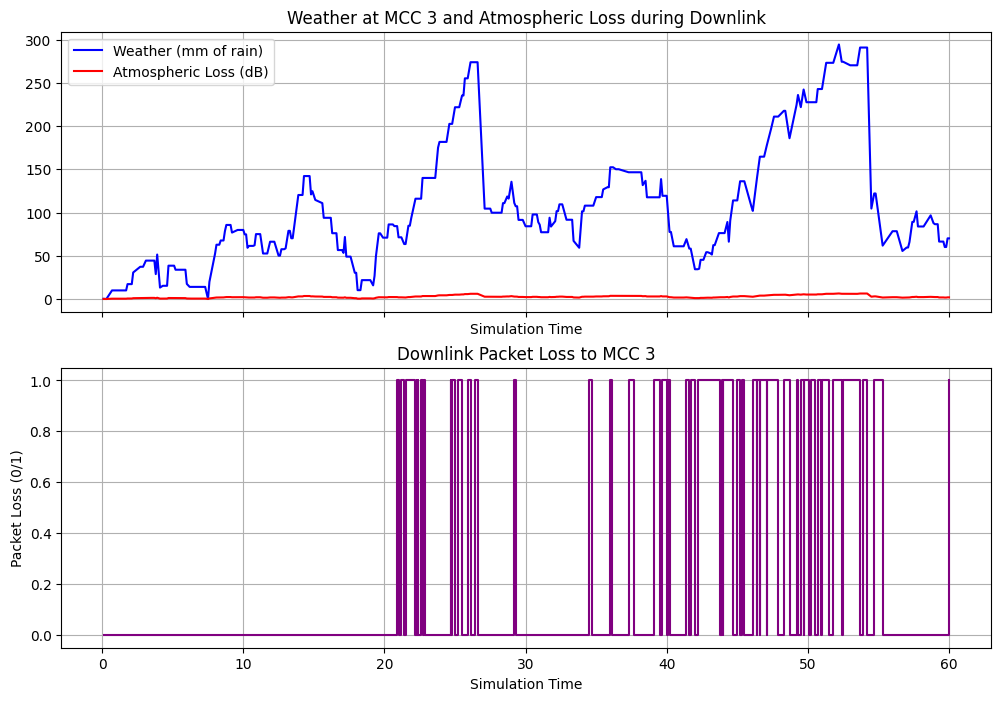

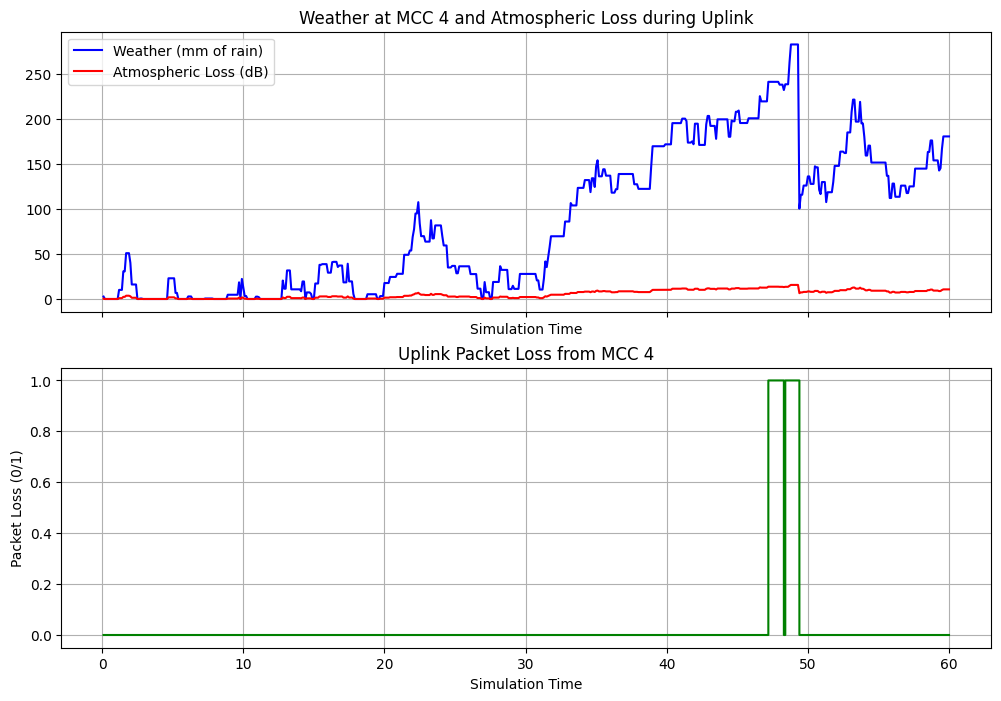

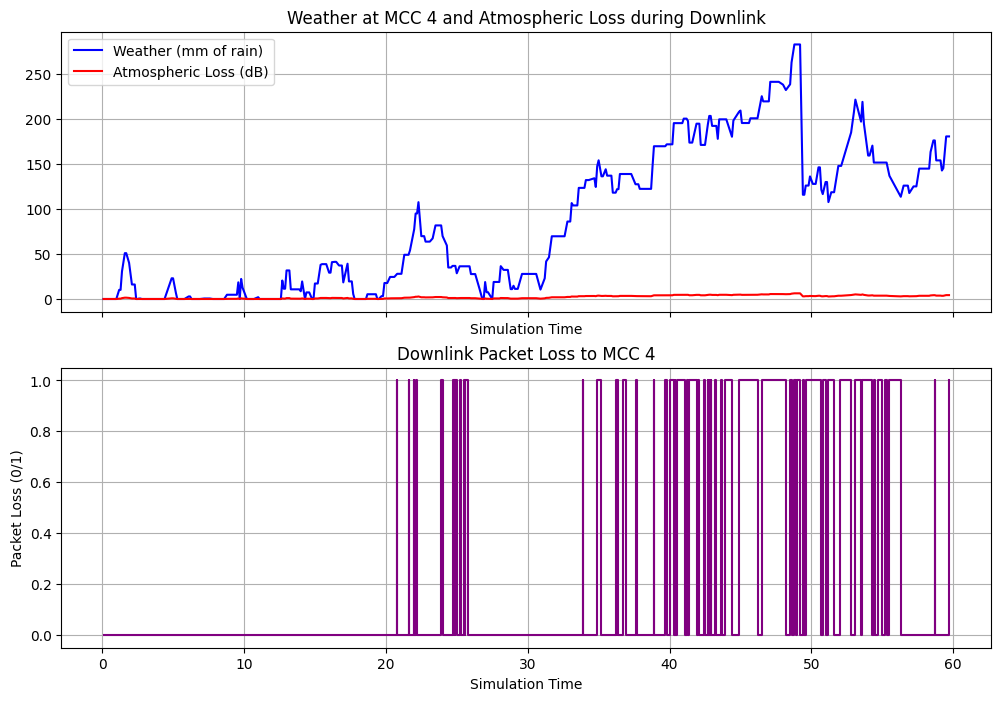

In [209]:
read_and_plot_files("C-Band-Variable")

## Ku-Band

MCC 0: Packets Sent = 865
MCC 0: Packets Lost = 79
MCC 1: Packets Sent = 865
MCC 1: Packets Lost = 86
MCC 2: Packets Sent = 865
MCC 2: Packets Lost = 88
MCC 3: Packets Sent = 865
MCC 3: Packets Lost = 69
MCC 4: Packets Sent = 865
MCC 4: Packets Lost = 79

Satellite: Packets Sent = 416
Satellite: Packets Lost = 3900

Average uplink Atmospheric loss (dB): 2.000
Stddev uplink Atmospheric loss (dB): 1.414
Average downlink Atmospheric loss (dB): 1.949
Stddev downlink Atmospheric loss (dB): 1.371

Average uplink FSPL (dB): 35.454
Stddev uplink FSPL (dB): 25.520
Average downlink FSPL (dB): 16.625
Stddev downlink FSPL (dB): 15.570

Average uplink power (dBm): 206.531
Stddev uplink power (dBm): 0.068
Average downlink power (dBm): 205.195
Stddev downlink power (dBm): 0.061


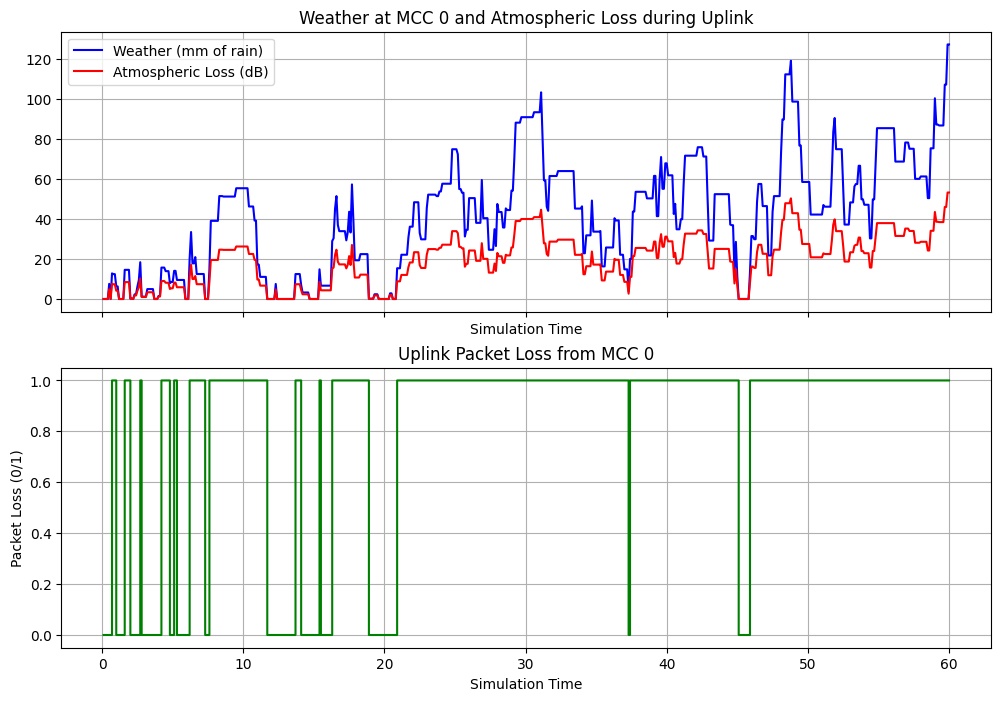

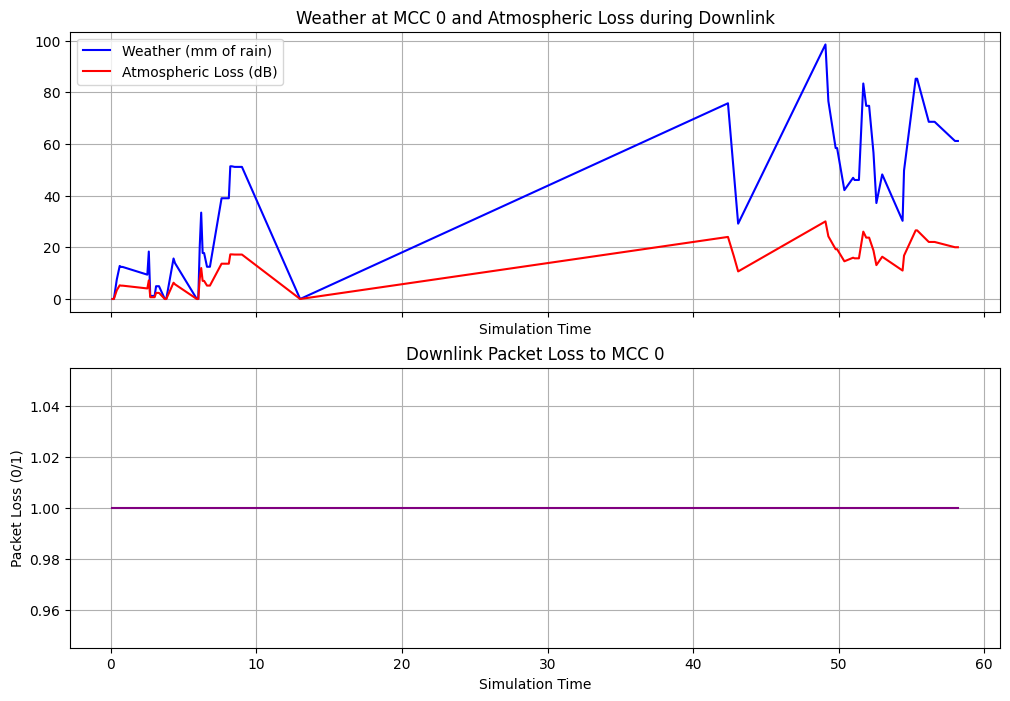

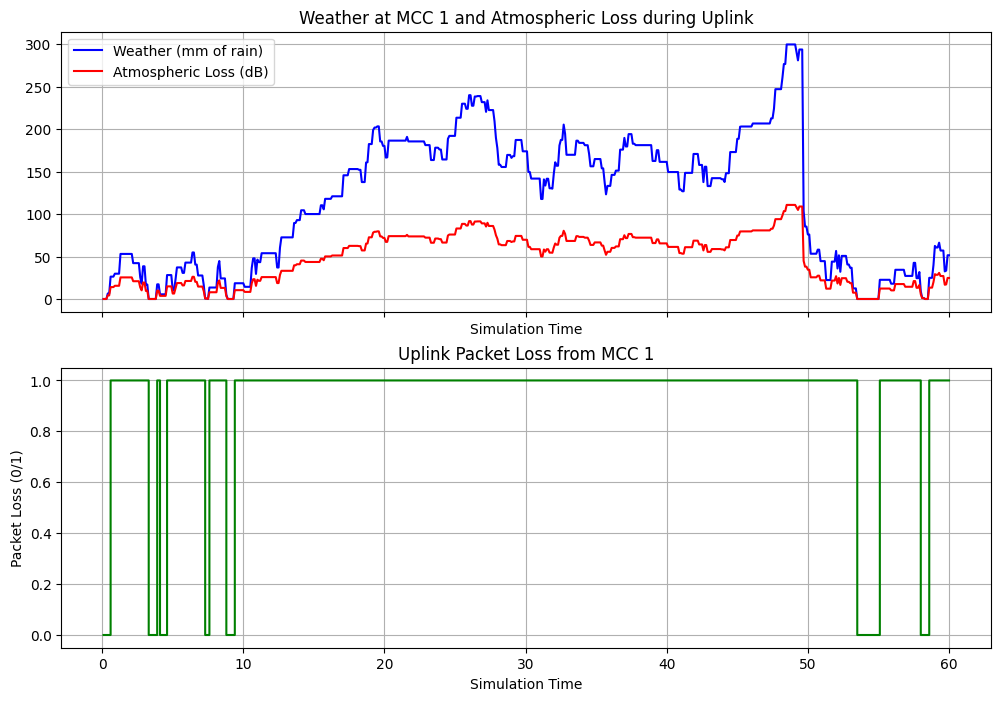

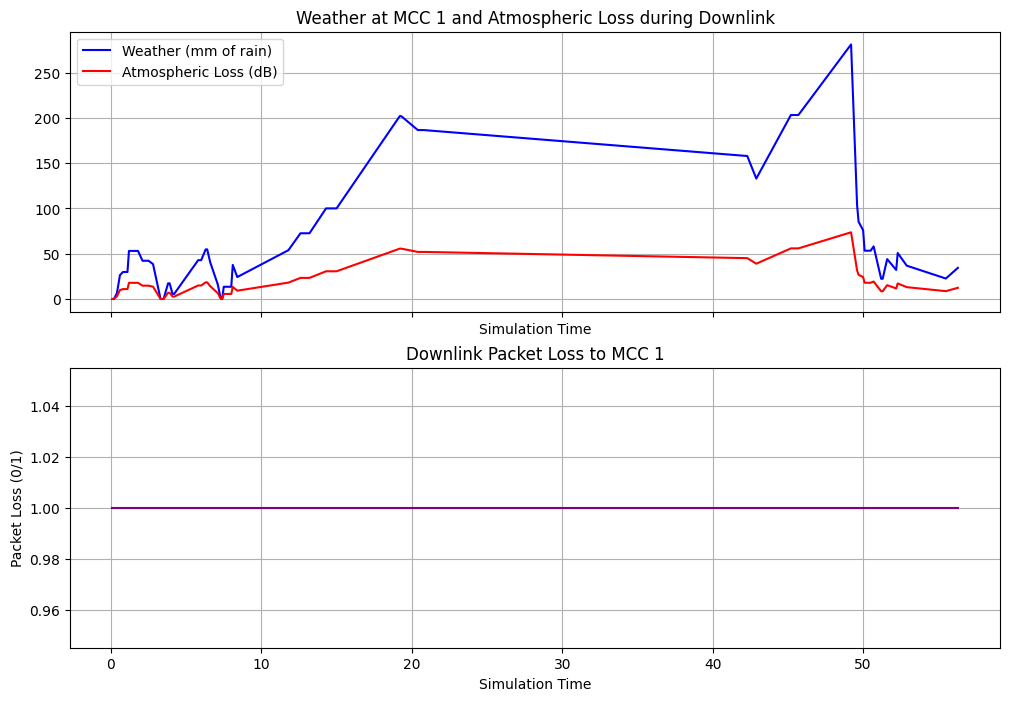

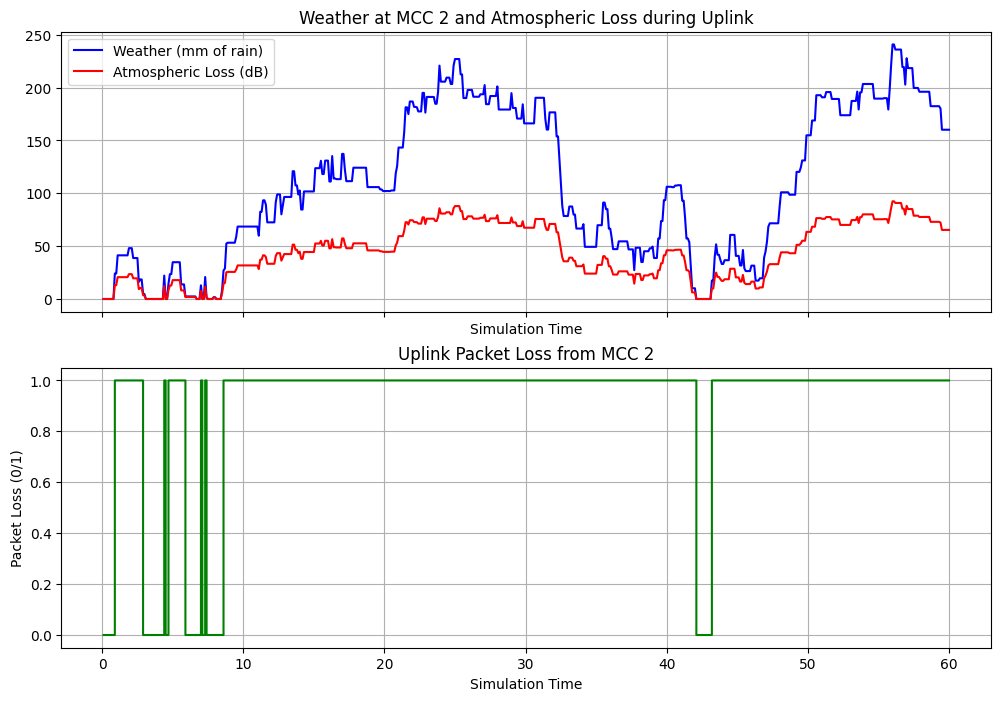

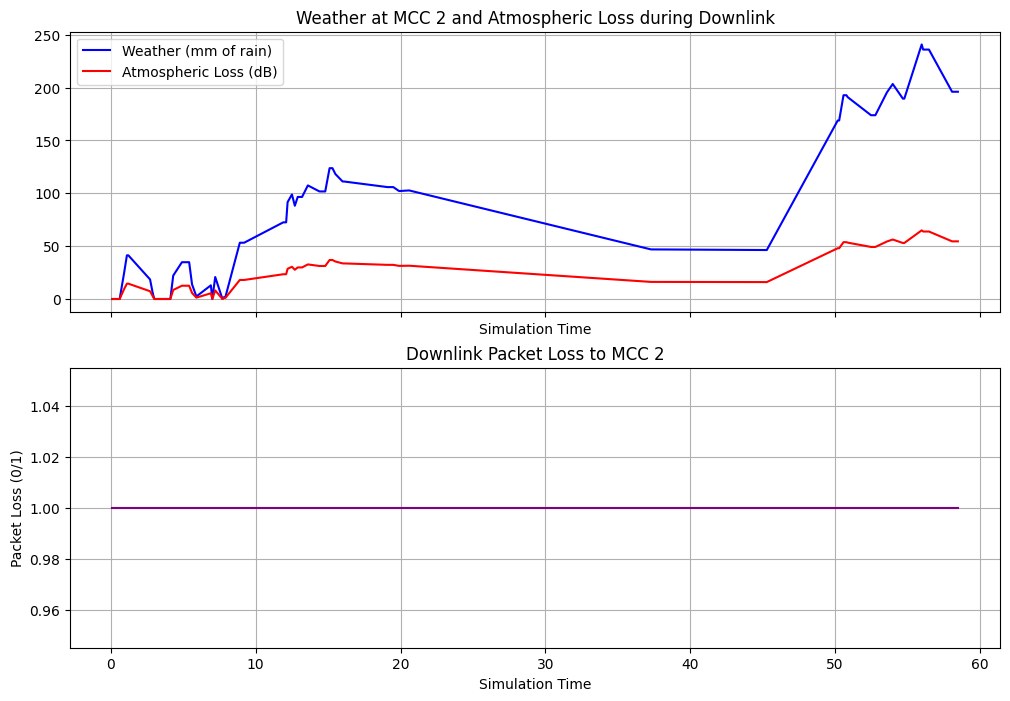

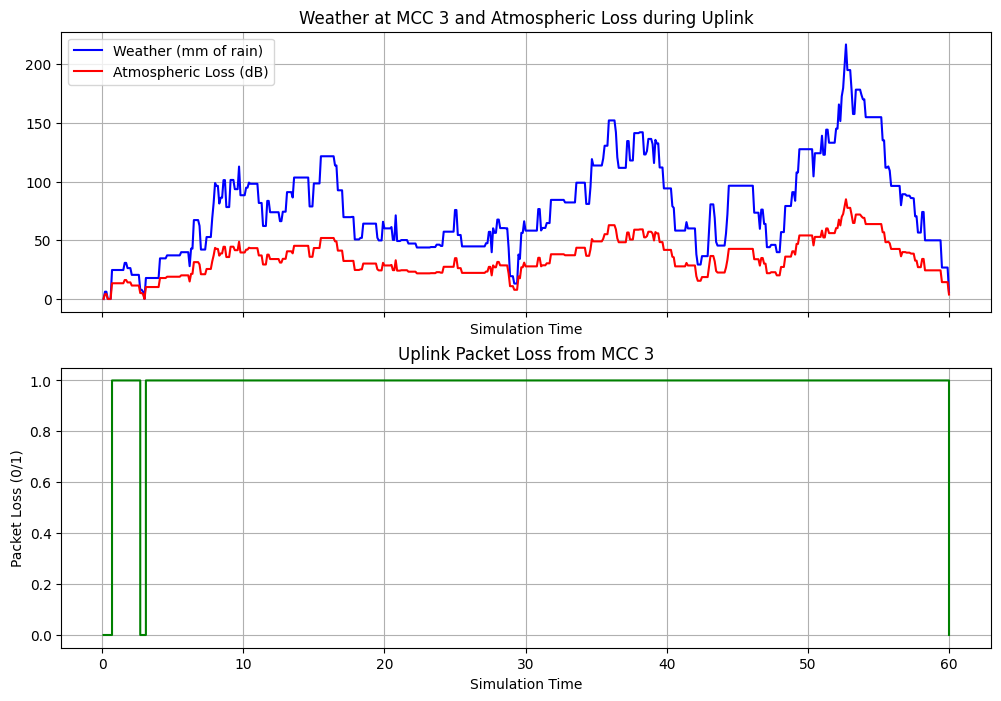

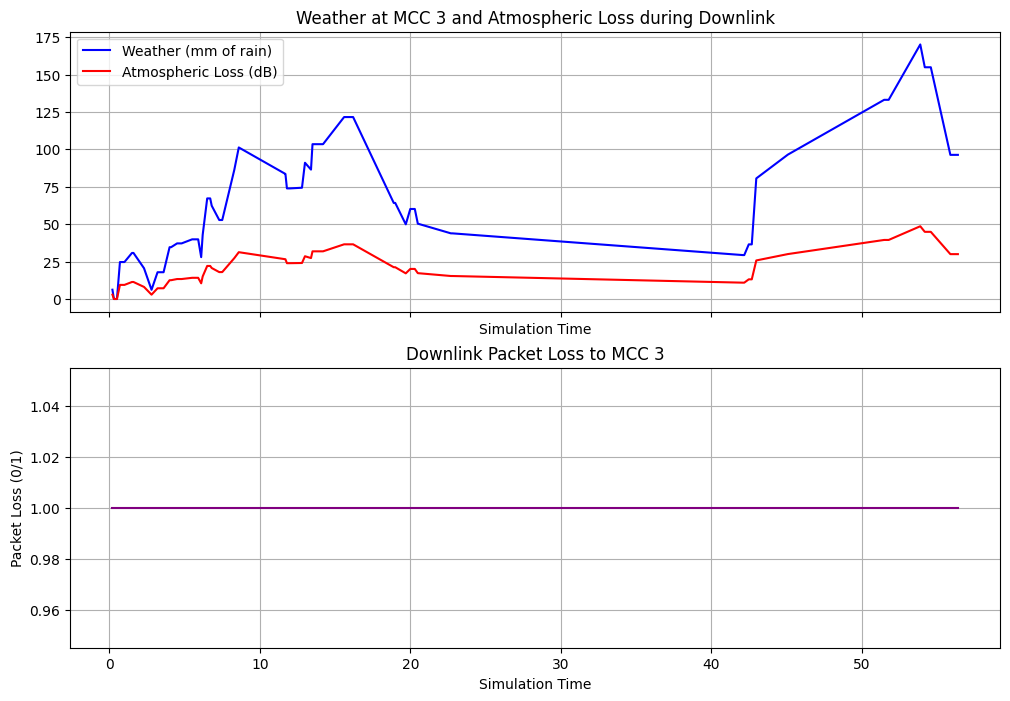

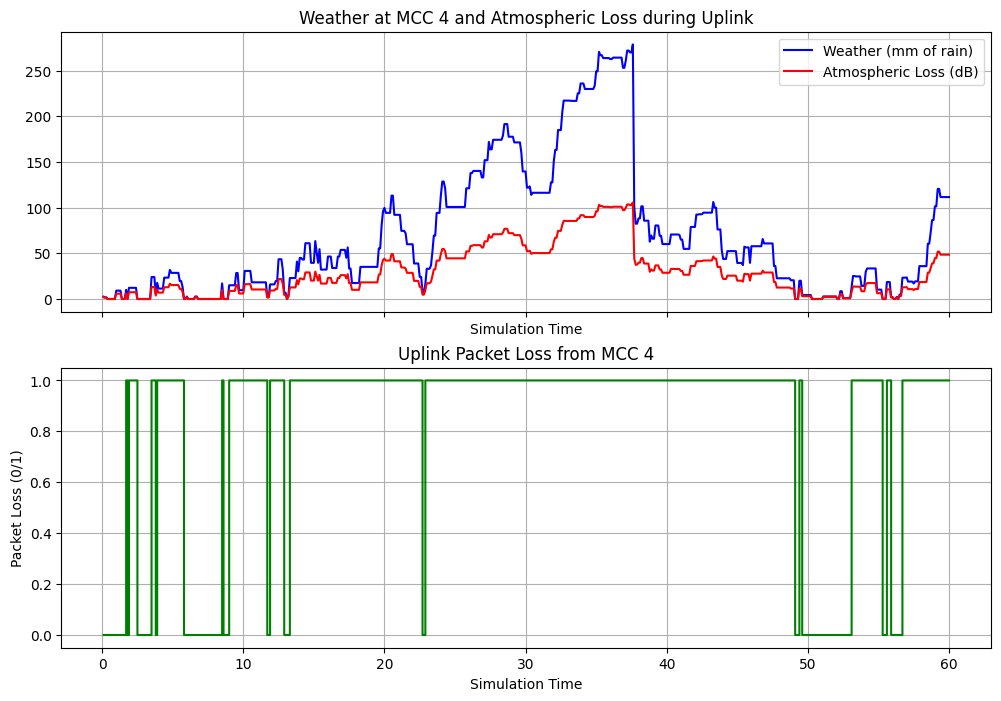

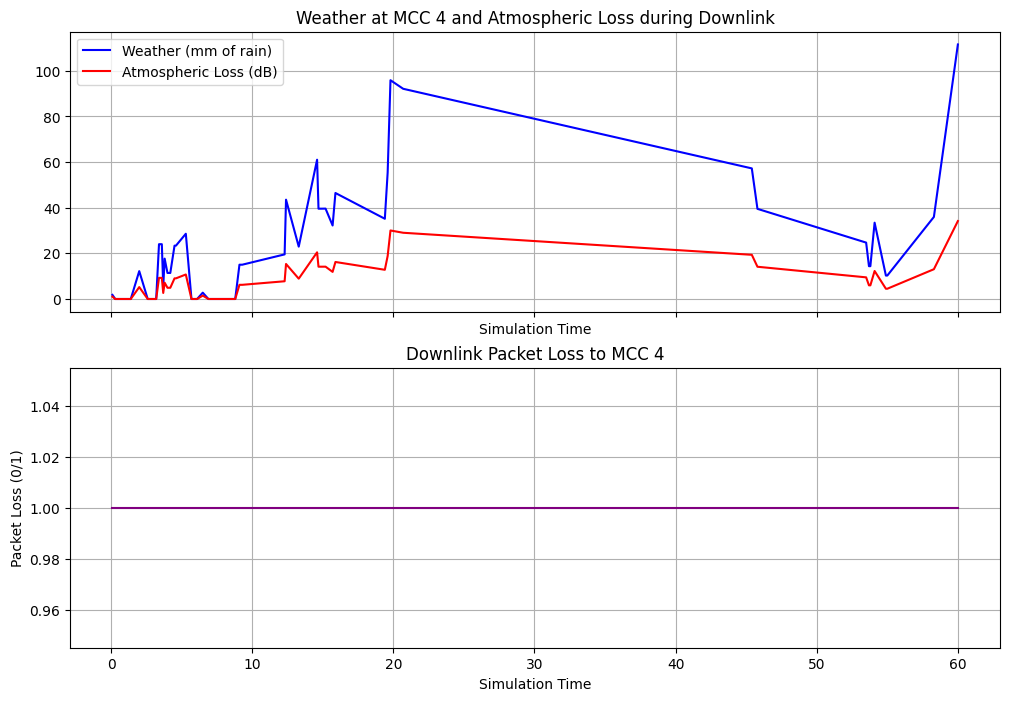

In [210]:
read_and_plot_files("Ku-Band-Variable")

## Ka-Band

MCC 0: Packets Sent = 811
MCC 0: Packets Lost = 0
MCC 1: Packets Sent = 811
MCC 1: Packets Lost = 0
MCC 2: Packets Sent = 811
MCC 2: Packets Lost = 0
MCC 3: Packets Sent = 810
MCC 3: Packets Lost = 0
MCC 4: Packets Sent = 810
MCC 4: Packets Lost = 0

Satellite: Packets Sent = 0
Satellite: Packets Lost = 4045

Average uplink Atmospheric loss (dB): 2.000
Stddev uplink Atmospheric loss (dB): 1.414
Average downlink Atmospheric loss (dB): nan
Stddev downlink Atmospheric loss (dB): nan

Average uplink FSPL (dB): 264.162
Stddev uplink FSPL (dB): 157.431
Average downlink FSPL (dB): nan
Stddev downlink FSPL (dB): nan



C:\Users\guido\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\numpy\lib\function_base.py:520: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
C:\Users\guido\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\numpy\core\_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
C:\Users\guido\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\numpy\core\_methods.py:206: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
C:\Users\guido\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\numpy\core\_methods.py:163: RuntimeWarning: invalid value encountered in divi

Average uplink power (dBm): 213.131
Stddev uplink power (dBm): 0.062
Average downlink power (dBm): nan
Stddev downlink power (dBm): nan


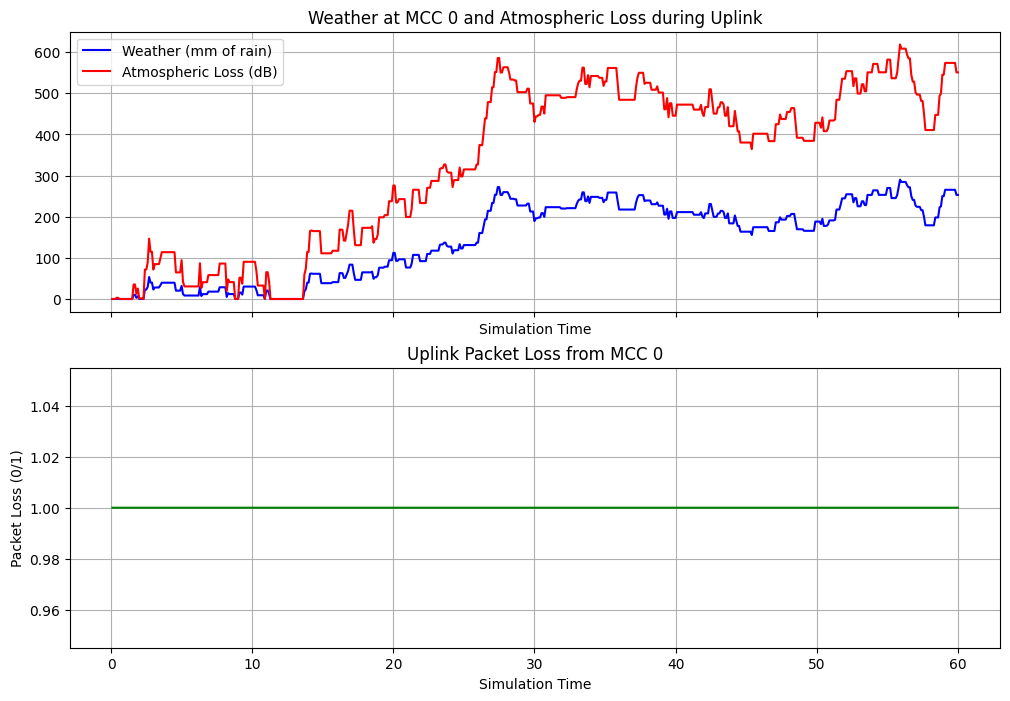

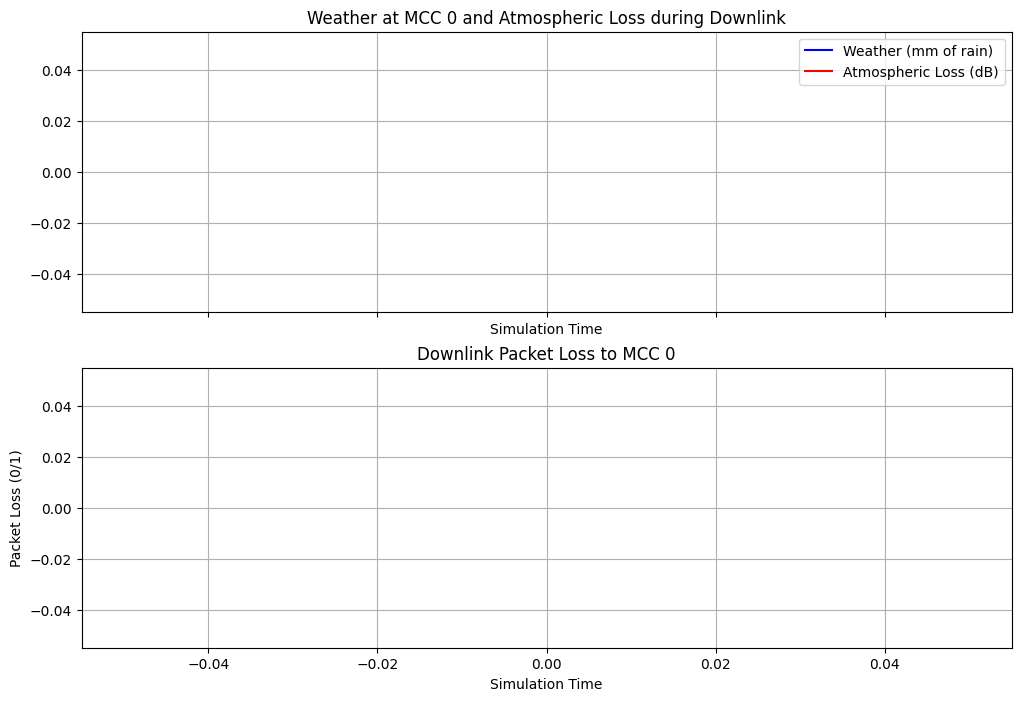

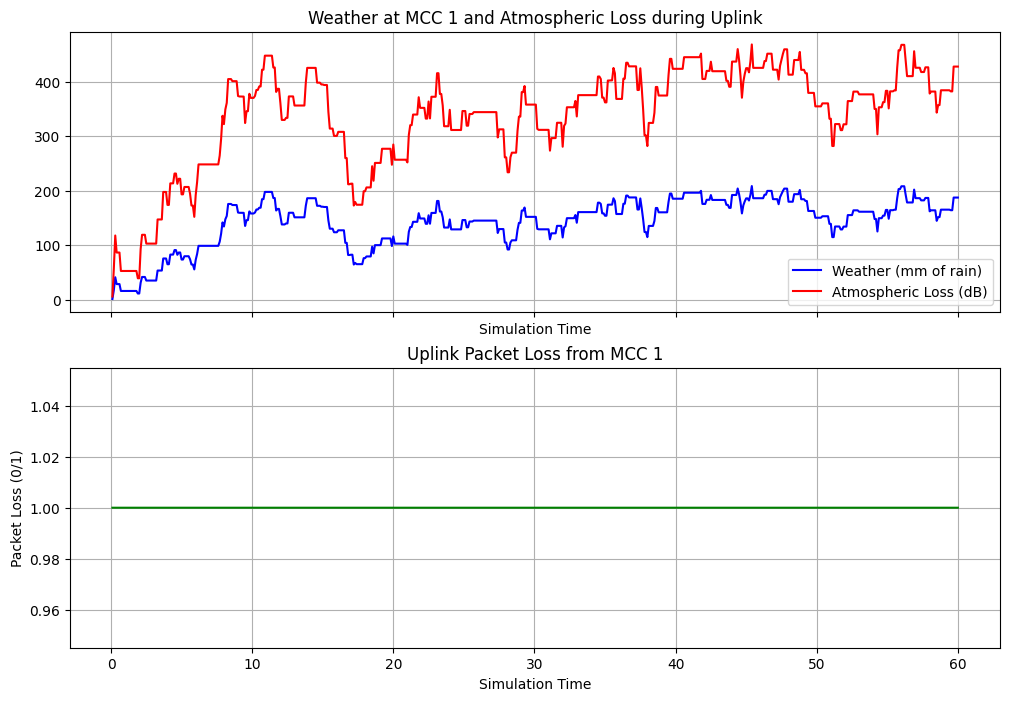

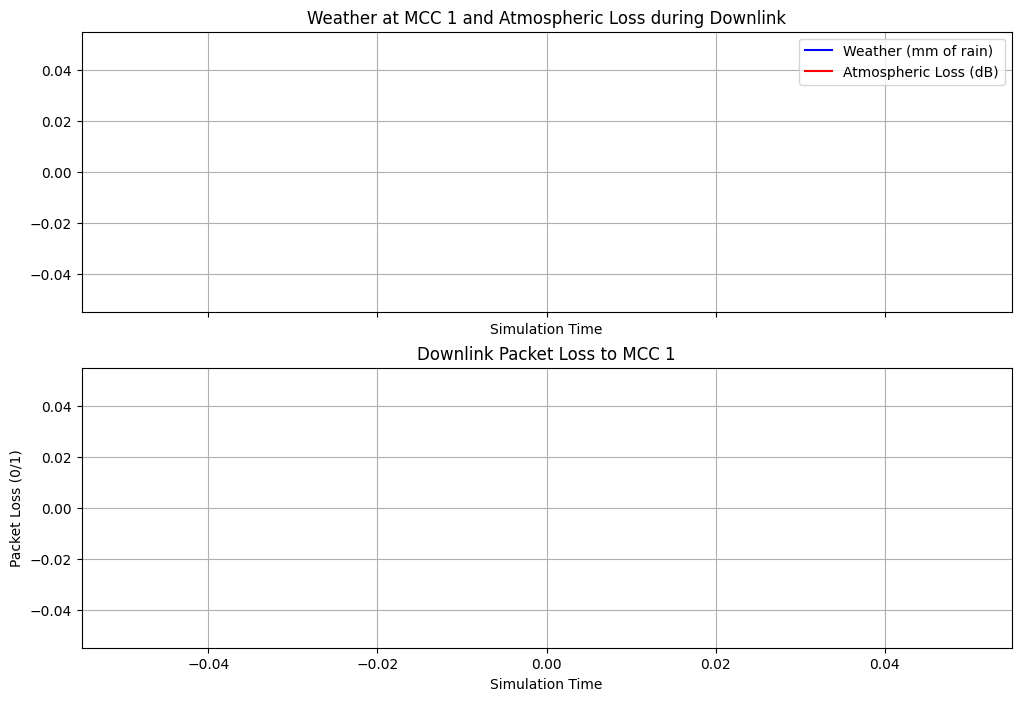

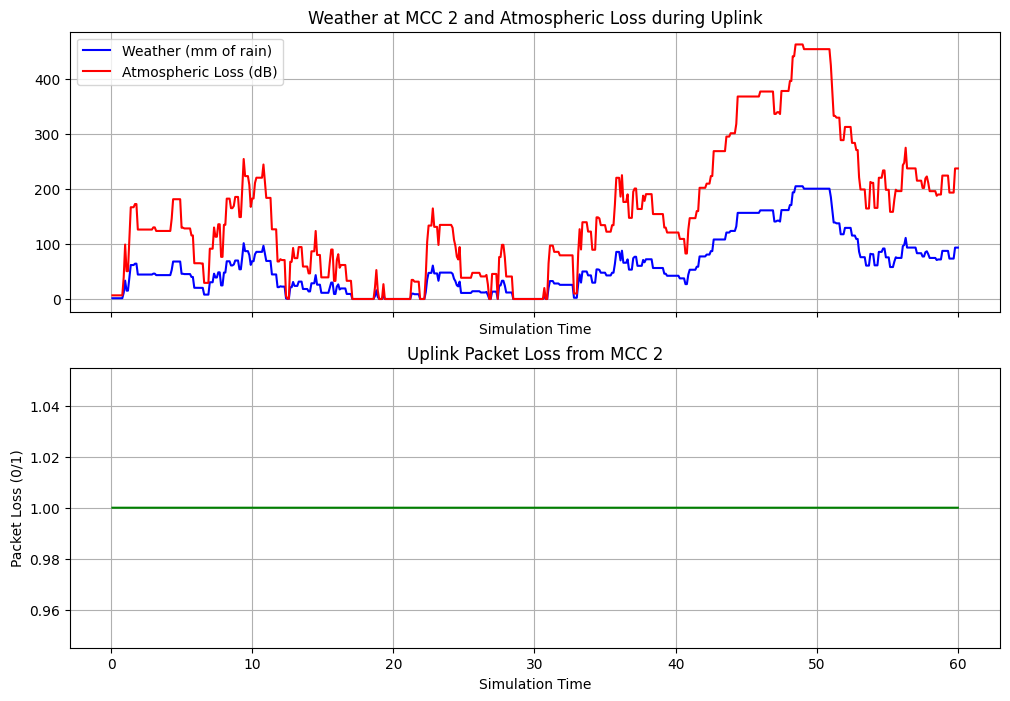

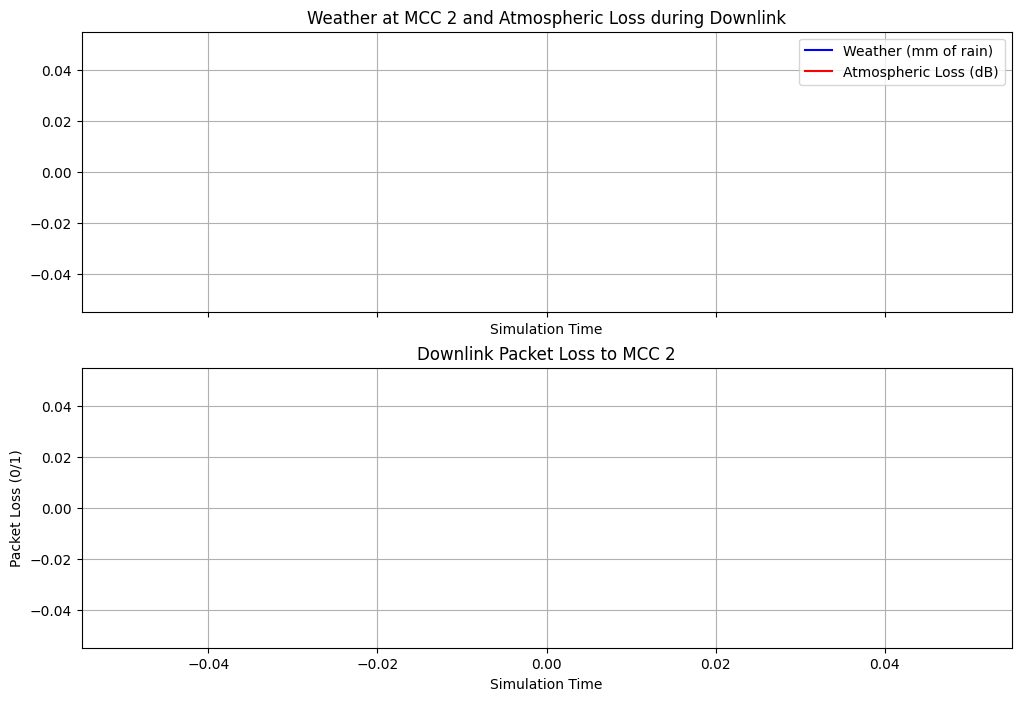

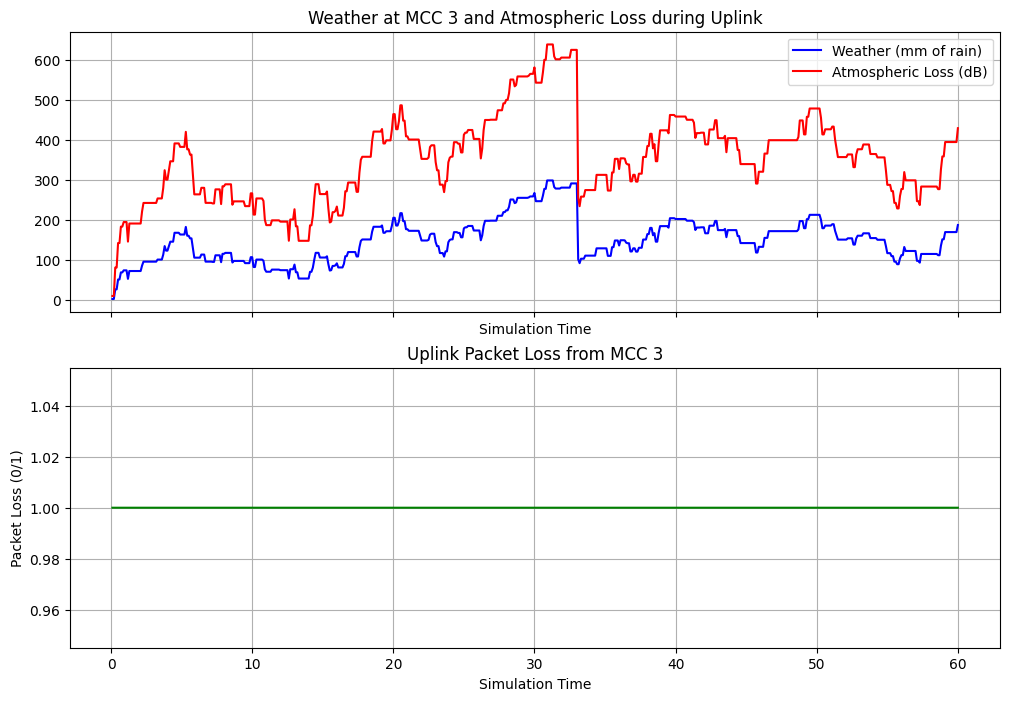

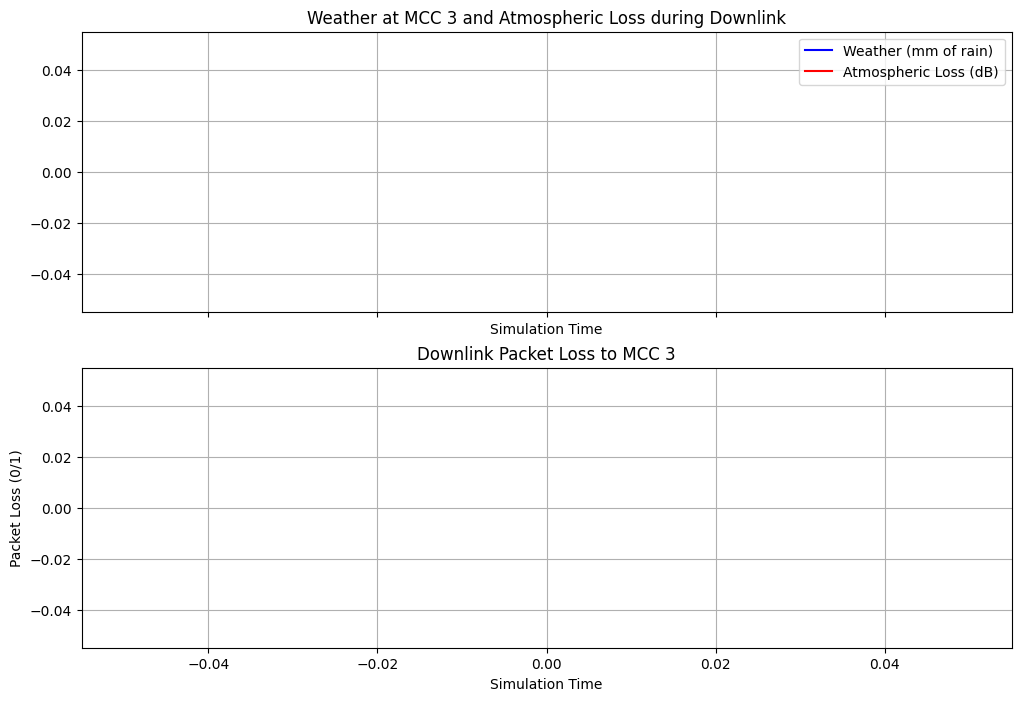

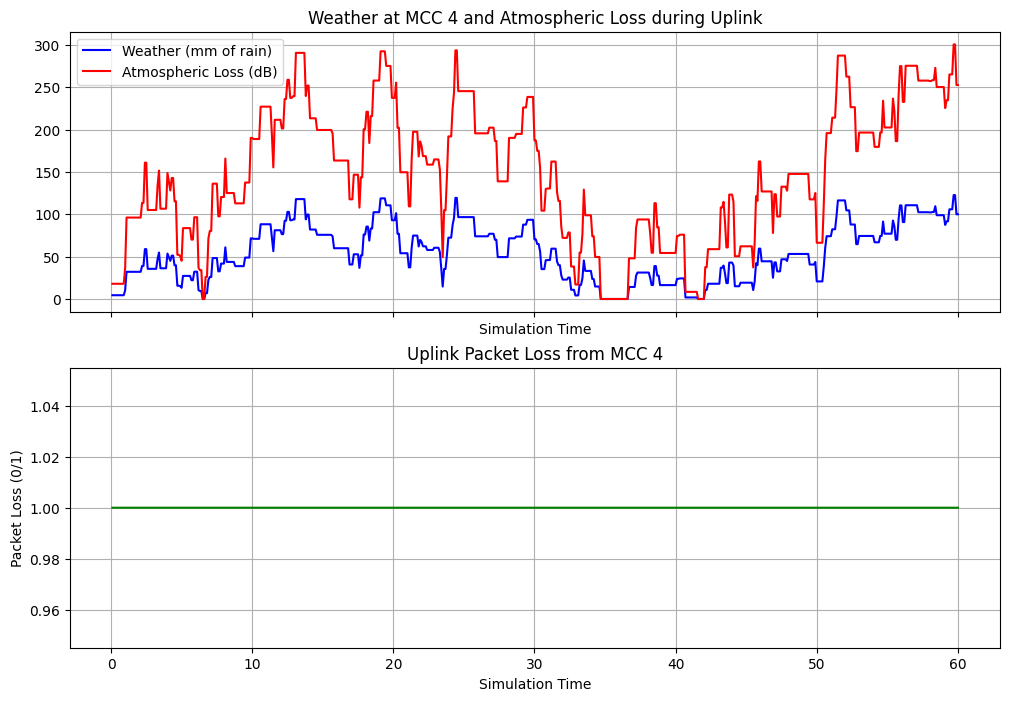

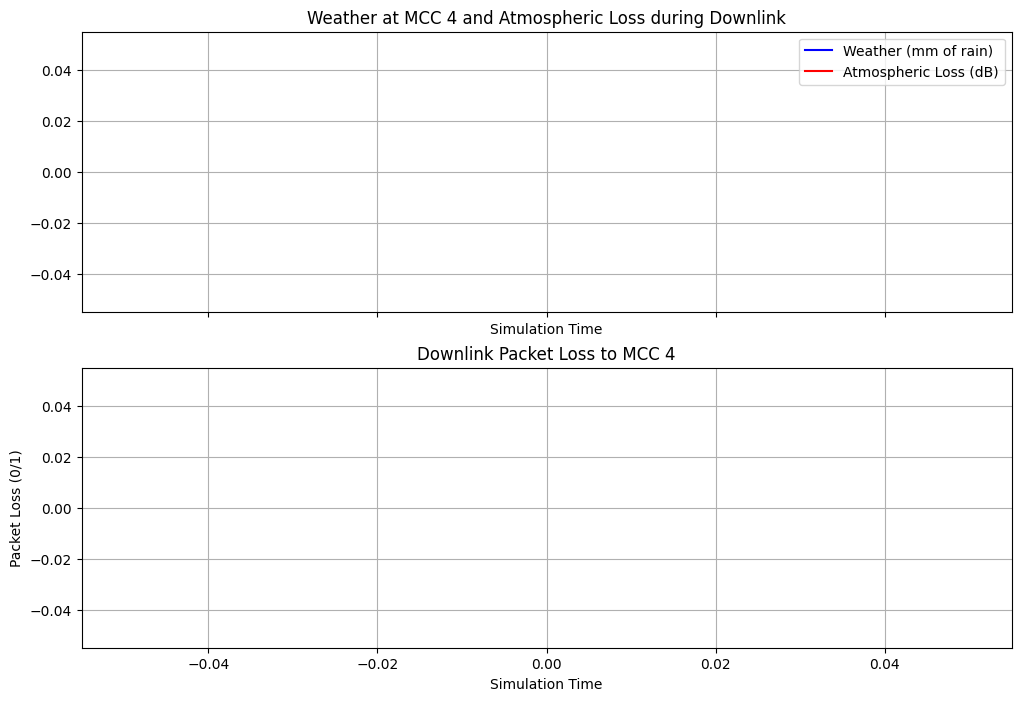

In [211]:
read_and_plot_files("Ka-Band-Variable")

# Static Weather Results

In [212]:
read_files("C-Band-Sunny")

MCC 0: Packets Lost = 0
MCC 1: Packets Lost = 0
MCC 2: Packets Lost = 0
MCC 3: Packets Lost = 0
MCC 4: Packets Lost = 0

Satellite: Packets Lost = 0

Average uplink Atmospheric loss (dB): 0.000
Stddev uplink Atmospheric loss (dB): 0.000
Average downlink Atmospheric loss (dB): 0.000
Stddev downlink Atmospheric loss (dB): 0.000

Average uplink FSPL (dB): 199.220
Stddev uplink FSPL (dB): 0.091
Average downlink FSPL (dB): 195.739
Stddev downlink FSPL (dB): 0.106

Average uplink power (dBm): -76.667
Stddev uplink power (dBm): 0.091
Average downlink power (dBm): -108.307
Stddev downlink power (dBm): 0.155


In [213]:
read_files("C-Band-Rainy")

MCC 0: Packets Lost = 0
MCC 1: Packets Lost = 0
MCC 2: Packets Lost = 0
MCC 3: Packets Lost = 0
MCC 4: Packets Lost = 0

Satellite: Packets Lost = 0

Average uplink Atmospheric loss (dB): 0.495
Stddev uplink Atmospheric loss (dB): 0.008
Average downlink Atmospheric loss (dB): 0.197
Stddev downlink Atmospheric loss (dB): 0.005

Average uplink FSPL (dB): 199.220
Stddev uplink FSPL (dB): 0.091
Average downlink FSPL (dB): 195.741
Stddev downlink FSPL (dB): 0.106

Average uplink power (dBm): -77.163
Stddev uplink power (dBm): 0.097
Average downlink power (dBm): -109.001
Stddev downlink power (dBm): 0.162


In [214]:
read_files("C-Band-HeavyRain")

MCC 0: Packets Lost = 0
MCC 1: Packets Lost = 0
MCC 2: Packets Lost = 0
MCC 3: Packets Lost = 0
MCC 4: Packets Lost = 0

Satellite: Packets Lost = 0

Average uplink Atmospheric loss (dB): 1.260
Stddev uplink Atmospheric loss (dB): 0.020
Average downlink Atmospheric loss (dB): 0.502
Stddev downlink Atmospheric loss (dB): 0.012

Average uplink FSPL (dB): 199.220
Stddev uplink FSPL (dB): 0.091
Average downlink FSPL (dB): 195.741
Stddev downlink FSPL (dB): 0.107

Average uplink power (dBm): -77.928
Stddev uplink power (dBm): 0.107
Average downlink power (dBm): -110.070
Stddev downlink power (dBm): 0.170


In [215]:
read_files("Ku-Band-Sunny")

MCC 0: Packets Lost = 912
MCC 1: Packets Lost = 1013
MCC 2: Packets Lost = 955
MCC 3: Packets Lost = 992
MCC 4: Packets Lost = 916

Satellite: Packets Lost = 0

Average uplink Atmospheric loss (dB): 0.000
Stddev uplink Atmospheric loss (dB): 0.000
Average downlink Atmospheric loss (dB): 0.000
Stddev downlink Atmospheric loss (dB): 0.000

Average uplink FSPL (dB): 206.531
Stddev uplink FSPL (dB): 0.068
Average downlink FSPL (dB): 205.198
Stddev downlink FSPL (dB): 0.066

Average uplink power (dBm): -83.978
Stddev uplink power (dBm): 0.068
Average downlink power (dBm): -125.076
Stddev downlink power (dBm): 0.126


In [216]:
read_files("Ku-Band-Rainy")

MCC 0: Packets Lost = 892
MCC 1: Packets Lost = 948
MCC 2: Packets Lost = 985
MCC 3: Packets Lost = 937
MCC 4: Packets Lost = 838

Satellite: Packets Lost = 0

Average uplink Atmospheric loss (dB): 3.432
Stddev uplink Atmospheric loss (dB): 0.024
Average downlink Atmospheric loss (dB): 2.411
Stddev downlink Atmospheric loss (dB): 0.019

Average uplink FSPL (dB): 206.531
Stddev uplink FSPL (dB): 0.068
Average downlink FSPL (dB): 205.197
Stddev downlink FSPL (dB): 0.065

Average uplink power (dBm): -87.410
Stddev uplink power (dBm): 0.083
Average downlink power (dBm): -130.918
Stddev downlink power (dBm): 0.137


In [217]:
read_files("Ku-Band-HeavyRain")

MCC 0: Packets Lost = 890
MCC 1: Packets Lost = 965
MCC 2: Packets Lost = 928
MCC 3: Packets Lost = 978
MCC 4: Packets Lost = 885

Satellite: Packets Lost = 0

Average uplink Atmospheric loss (dB): 8.731
Stddev uplink Atmospheric loss (dB): 0.061
Average downlink Atmospheric loss (dB): 6.135
Stddev downlink Atmospheric loss (dB): 0.049

Average uplink FSPL (dB): 206.531
Stddev uplink FSPL (dB): 0.068
Average downlink FSPL (dB): 205.198
Stddev downlink FSPL (dB): 0.066

Average uplink power (dBm): -92.709
Stddev uplink power (dBm): 0.112
Average downlink power (dBm): -139.942
Stddev downlink power (dBm): 0.164


In [218]:
read_files("Ka-Band-Sunny")

MCC 0: Packets Lost = 838
MCC 1: Packets Lost = 894
MCC 2: Packets Lost = 864
MCC 3: Packets Lost = 886
MCC 4: Packets Lost = 881

Satellite: Packets Lost = 0

Average uplink Atmospheric loss (dB): 0.000
Stddev uplink Atmospheric loss (dB): 0.000
Average downlink Atmospheric loss (dB): 0.000
Stddev downlink Atmospheric loss (dB): 0.000

Average uplink FSPL (dB): 213.131
Stddev uplink FSPL (dB): 0.062
Average downlink FSPL (dB): 209.618
Stddev downlink FSPL (dB): 0.061

Average uplink power (dBm): -90.578
Stddev uplink power (dBm): 0.062
Average downlink power (dBm): -136.096
Stddev downlink power (dBm): 0.121


In [219]:
read_files("Ka-Band-Rainy")

MCC 0: Packets Lost = 0
MCC 1: Packets Lost = 0
MCC 2: Packets Lost = 0
MCC 3: Packets Lost = 0
MCC 4: Packets Lost = 0

Satellite: Packets Lost = 5705

Average uplink Atmospheric loss (dB): 19.703
Stddev uplink Atmospheric loss (dB): 0.064
Average downlink Atmospheric loss (dB): nan
Stddev downlink Atmospheric loss (dB): nan

Average uplink FSPL (dB): 213.131
Stddev uplink FSPL (dB): 0.062
Average downlink FSPL (dB): nan
Stddev downlink FSPL (dB): nan



C:\Users\guido\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\numpy\lib\function_base.py:520: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
C:\Users\guido\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\numpy\core\_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
C:\Users\guido\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\numpy\core\_methods.py:206: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
C:\Users\guido\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\numpy\core\_methods.py:163: RuntimeWarning: invalid value encountered in divi

Average uplink power (dBm): -110.281
Stddev uplink power (dBm): 0.103
Average downlink power (dBm): nan
Stddev downlink power (dBm): nan


In [220]:
read_files("Ka-Band-HeavyRain")

MCC 0: Packets Lost = 0
MCC 1: Packets Lost = 0
MCC 2: Packets Lost = 0
MCC 3: Packets Lost = 0
MCC 4: Packets Lost = 0

Satellite: Packets Lost = 5625

Average uplink Atmospheric loss (dB): 50.128
Stddev uplink Atmospheric loss (dB): 0.163
Average downlink Atmospheric loss (dB): nan
Stddev downlink Atmospheric loss (dB): nan

Average uplink FSPL (dB): 213.131
Stddev uplink FSPL (dB): 0.062
Average downlink FSPL (dB): nan
Stddev downlink FSPL (dB): nan

Average uplink power (dBm): -140.706
Stddev uplink power (dBm): 0.192
Average downlink power (dBm): nan
Stddev downlink power (dBm): nan


C:\Users\guido\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\numpy\lib\function_base.py:520: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
C:\Users\guido\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\numpy\core\_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
C:\Users\guido\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\numpy\core\_methods.py:206: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
C:\Users\guido\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\numpy\core\_methods.py:163: RuntimeWarning: invalid value encountered in divi

In [221]:
read_files("C-Band-Variable")

MCC 0: Packets Sent = 631
MCC 0: Packets Lost = 79
MCC 1: Packets Sent = 631
MCC 1: Packets Lost = 111
MCC 2: Packets Sent = 631
MCC 2: Packets Lost = 77
MCC 3: Packets Sent = 631
MCC 3: Packets Lost = 115
MCC 4: Packets Sent = 631
MCC 4: Packets Lost = 104

Satellite: Packets Sent = 2870
Satellite: Packets Lost = 280

Average uplink Atmospheric loss (dB): 2.000
Stddev uplink Atmospheric loss (dB): 1.414
Average downlink Atmospheric loss (dB): 2.002
Stddev downlink Atmospheric loss (dB): 1.447

Average uplink FSPL (dB): 5.961
Stddev uplink FSPL (dB): 4.400
Average downlink FSPL (dB): 2.292
Stddev downlink FSPL (dB): 1.684

Average uplink power (dBm): 199.220
Stddev uplink power (dBm): 0.091
Average downlink power (dBm): 195.744
Stddev downlink power (dBm): 0.107
